In [69]:
###########################################
# setting1  undersampled all              #
#                                         #
# setting 2 undersampled training         #
###########################################
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import cross_val_score

In [8]:
##############################################
#   setting1 undersampled over all data     #
#############################################
x_train_setting1=np.loadtxt("preprocessed_undersampled_alldata_setting1/x_train.csv", delimiter=",")
y_train_setting1=np.loadtxt("preprocessed_undersampled_alldata_setting1/y_train.csv", delimiter=",")
x_valid_setting1=np.loadtxt("preprocessed_undersampled_alldata_setting1/x_valid.csv", delimiter=",")
y_valid_setting1=np.loadtxt("preprocessed_undersampled_alldata_setting1/y_valid.csv", delimiter=",")
x_test_setting1=np.loadtxt("preprocessed_undersampled_alldata_setting1/x_test.csv", delimiter=",")
y_test_setting1=np.loadtxt("preprocessed_undersampled_alldata_setting1/y_test.csv", delimiter=",")

In [70]:
#############################random Forest


In [56]:
clf = RandomForestClassifier( max_depth = 9, max_leaf_nodes=9)
clf.fit(x_train_setting1, y_train_setting1)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9)

In [57]:
# validate using validation set
acc = np.zeros((20,20))  # store accuracy 
for i in range(20):
     for j in range(20):
         clf = RandomForestClassifier(max_depth = i+1, max_leaf_nodes=j+2)
         clf.fit(x_valid_setting1, y_valid_setting1)
         y_pred = clf.predict(x_valid_setting1)
         acc[i,j] = accuracy_score(y_valid_setting1, y_pred)

best_mod = np.where(acc == acc.max())
print (best_mod)
print (acc[best_mod])

(array([19], dtype=int64), array([18], dtype=int64))
[0.69795918]


In [75]:
print(int(best_mod[0])+1,int(best_mod[1]) + 2)

20 20


In [111]:
n_estimators_list=range(1,2000,100)
record=[]
for n_estimators in n_estimators_list:
    clf=RandomForestClassifier(n_estimators=n_estimators,max_depth =20, max_leaf_nodes=20)
    r2=cross_val_score( clf, x_train_setting1, y_train_setting1, scoring='r2').mean()#cv=5
    record.append(r2)

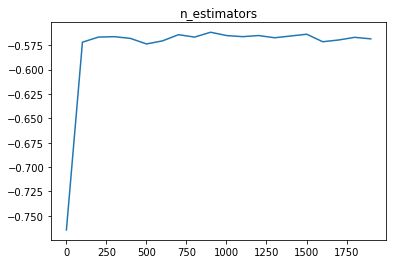

The best parameter: 901


In [112]:
plt.plot(n_estimators_list,record)
plt.title('n_estimators')
plt.show()
print('The best parameter:',n_estimators_list[np.array(record).argsort()[-1:][0]])

In [113]:
##############################
#    n_estimators=901        #
##############################################################
#    resampled x_train,y_train, scaled_x_train,scaled_y test #
##############################################################
randomforest = RandomForestClassifier(n_estimators=901)
randomforest.fit(x_train_setting1, y_train_setting1)
y_pred = randomforest.predict(x_test_setting1)
print(metrics.classification_report(y_test_setting1, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.58      0.60      1109
         1.0       0.60      0.62      0.61      1096

    accuracy                           0.60      2205
   macro avg       0.60      0.60      0.60      2205
weighted avg       0.60      0.60      0.60      2205



In [114]:
randomforest = RandomForestClassifier(max_depth=20,max_leaf_nodes=20)
randomforest.fit(x_train_setting1, y_train_setting1)
y_pred = randomforest.predict(x_test_setting1)
print(metrics.classification_report(y_test_setting1, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.59      0.60      1109
         1.0       0.60      0.63      0.61      1096

    accuracy                           0.61      2205
   macro avg       0.61      0.61      0.61      2205
weighted avg       0.61      0.61      0.61      2205



In [115]:
randomforest = RandomForestClassifier(n_estimators=901,max_depth=20,max_leaf_nodes=20)
randomforest.fit(x_train_setting1, y_train_setting1)
y_pred = randomforest.predict(x_test_setting1)
print(metrics.classification_report(y_test_setting1, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60      1109
         1.0       0.60      0.65      0.62      1096

    accuracy                           0.61      2205
   macro avg       0.61      0.61      0.61      2205
weighted avg       0.61      0.61      0.61      2205



In [116]:
print(confusion_matrix(y_test_setting1, y_pred))

[[639 470]
 [386 710]]


In [117]:
print("ROC_AUC_score",roc_auc_score(y_test_setting1,y_pred,average=None))

ROC_AUC_score 0.6120024945206111


Text(0.5, 1.0, 'Accuracy Score: 0.6117913832199546')

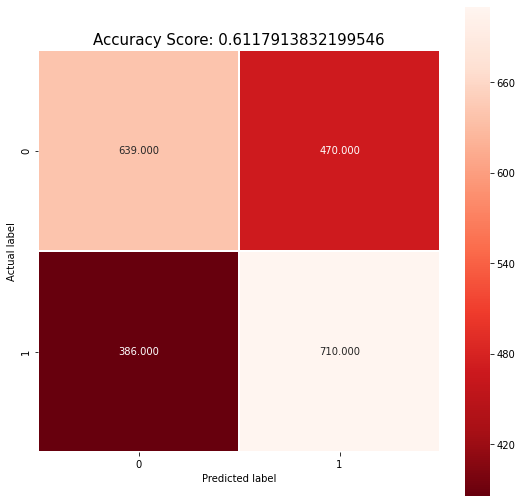

In [120]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test_setting1, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test_setting1, y_test_setting1))
plt.title(all_sample_title, size = 15)

D:\anacod\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

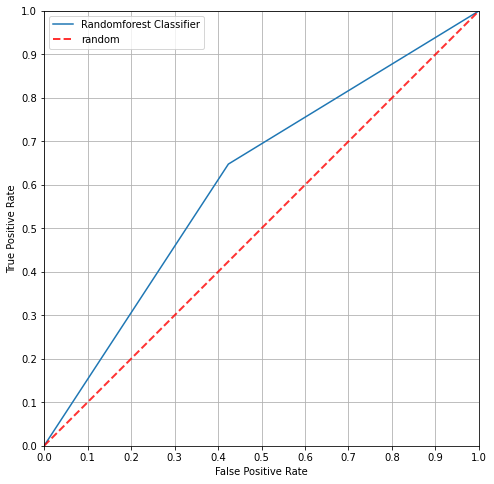

In [121]:
##############
# ROC Curve #
#############
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test_setting1, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [122]:
###########################################################
#    undersampled setting 2, undersample training only    #
###########################################################
x_train_undersampled = np.loadtxt("preprocessed_undersampled_setting2/x_train_undersampled.csv", delimiter=',')
y_train_undersampled = np.loadtxt("preprocessed_undersampled_setting2/y_train_undersampled.csv", delimiter=',')
x_valid=np.loadtxt("preprocessed_undersampled_setting2/x_valid.csv",delimiter=",")
y_valid=np.loadtxt("preprocessed_undersampled_setting2/y_valid.csv",delimiter=",")
x_test=np.loadtxt("preprocessed_undersampled_setting2/x_test.csv",delimiter=",")
y_test=np.loadtxt("preprocessed_undersampled_setting2/y_test.csv",delimiter=",")

In [136]:
clf = RandomForestClassifier()
clf.fit(x_train_undersampled, y_train_undersampled)

RandomForestClassifier()

In [138]:
acc = np.zeros((20,20))  # store accuracy 
for i in range(20):
     for j in range(20):
         clf = RandomForestClassifier(max_depth = i+1, max_leaf_nodes=j+2)
         clf.fit(x_valid, y_valid)
         y_pred = clf.predict(x_valid)
         acc[i,j] = accuracy_score(y_valid, y_pred)

best_mod = np.where(acc == acc.max())
print (best_mod)
print (acc[best_mod])

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 1

In [139]:
n_estimators_list=range(1,2000,100)
record=[]
for n_estimators in n_estimators_list:
    clf=RandomForestClassifier(n_estimators=n_estimators)
    r2=cross_val_score( clf, x_train_undersampled, y_train_undersampled, scoring='r2').mean()#cv=5
    record.append(r2)

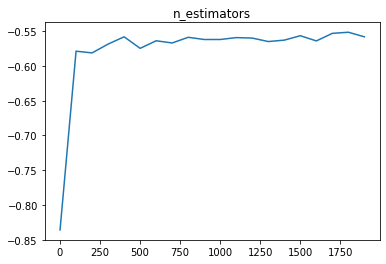

The best parameter: 1801


In [140]:
plt.plot(n_estimators_list,record)
plt.title('n_estimators')
plt.show()
print('The best parameter:',n_estimators_list[np.array(record).argsort()[-1:][0]])

In [141]:
###############################
#    n_estimators=1801        #
########################################################################################
#    undersampled x_train,y_train, no undersampling on scaled_x_test,not scaled_y test #
#######################################################################################
randomforest = RandomForestClassifier(n_estimators=1800)
randomforest.fit(x_train_undersampled, y_train_undersampled)
y_pred = randomforest.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      8432
         1.0       0.17      0.61      0.27      1136

    accuracy                           0.60      9568
   macro avg       0.55      0.61      0.50      9568
weighted avg       0.83      0.60      0.67      9568



In [142]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC_score",roc_auc_score(y_test,y_pred,average=None))

ROC_AUC_score 0.6051084734211721


D:\anacod\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0, 0.5, 'True Positive Rate')

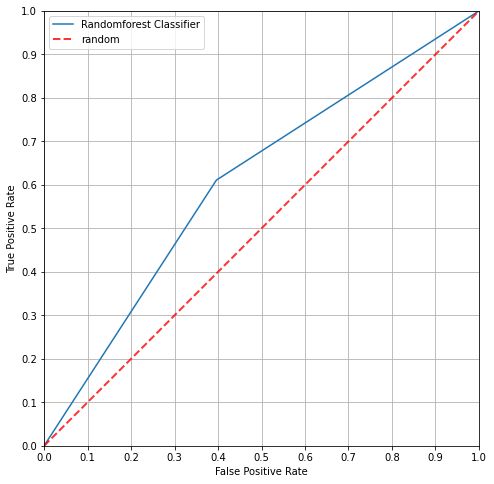

In [134]:
##############
# ROC Curve #
#############
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0.5, 1.0, 'Accuracy Score: 0.6033653846153846')

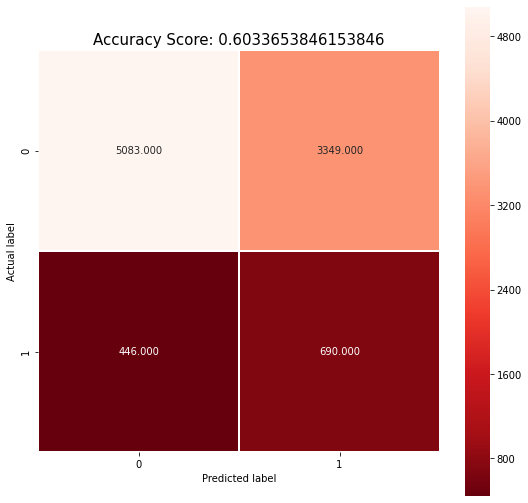

In [143]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(randomforest.score(x_test, y_test))
plt.title(all_sample_title, size = 15)